# 8. Process monitoring using PCA 📐

<a href="https://githubtocolab.com/edgarsmdn/MLCE_book/blob/main/08_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

## Goals of this exercise 🌟
- We will review the steps for PCA with an illustrative 2D example
- We will use PCA for process monitoring, specifically for fault detection.
- We will review the $T^2$ and $Q$ statistics for process monitoring

## A quick reminder ✅


Process monitoring aims to guarantee the effectiveness of planned operations by furnishing information that identifies and highlights any deviations in behavior. The four procedures associated with process monitoring are: fault detection, fault identification, fault diagnosis, and process recovery.

*   **Fault detection**: determining whether a fault has occurred
*   **Fault identification**: identifying the variables most relevant to diagnosing the fault
*   **Fault diagnosis**: determining the cause of the observed
*   **Process recovery**: emoving the effect of the fault

For fault detection, some measures are established based on statistical theory or systems theory. A threshold can be placed on some of these measures, and a fault is detected whenever one of the measures is evaluated outside the limit.

Unsupervised learning models help in extracting information that is useful for process monitoring and this becomes very valuable for the process engineers and operators.

**Principal Component Analysis** (PCA) is a popular technique used in process monitoring. It is a dimensionality reduction method that projects the original data into a lower dimension while retaining important information. The components in PCA are new variables that are a combination of the original variables. The first component captures the largest amount of variation in the data, and each subsequent component captures as much remaining variation as possible. This provides us with a hierarchical coordinate system.

PCA can be viewed as the statistical interpretation of Singular Value Decomosition. Here we will review the "standard" PCA procedure.

Given a dataset with $n_d$ datapoints $\mathcal{D}=\{ {\bf x}^{(1)},...,{\bf x}^{(n_d)} \}$, where each data point contains $n_x$ descriptors ${\bf x}^{(i)} \in \mathbb{R}^{n_x}$, which is a column vector. If ${\bf x}$ were measurements from a chemical process each $x_i$ from ${\bf x}=[x_1,...,x_{n_x}]^T$ would be a descriptor of that process such as temperature, preassure, concentrations... 

We can stack the transpose of datapoints as rows in a matrix to form:

$$
X = \begin{bmatrix}
    ({\bf x}^{(1)})^T \\ ({\bf x}^{(2)})^T \\ \vdots \\ ({\bf x}^{(n_d)})^T 
\end{bmatrix} =
\begin{bmatrix}
    x^{(1)}_{1}, x^{(1)}_{2}& ...  & x^{(1)}_{n_x}  \\
    x^{(2)}_{1}, x^{(2)}_{2}& ...  &x^{(2)}_{n_x} \\
    \vdots ~\quad  \vdots & \ddots  & \vdots  \\
    x^{(n_d)}_{1}, x^{(n_d)}_{2}& ... & x^{(n_d)}_{n_x} 
\end{bmatrix} \qquad
$$ 

where $X \in \mathbb{R}^{n_d \times n_x}$, typically, in chemical engineering $n_d >> n_x$.


**1) Standardize the data** 
 
We define $\overline{x}_j = \frac{1}{n_d} \sum_{i=1}^{n_d} x_j^{(i)}$ as the mean value, and $\sigma_j = \sqrt{ \frac{\sum_{i=1}^{n_d} (x_j^{(i)} - \overline{x}_j)^2}{n_d-1}}$  as the standard deviation for each dimension $j$. Then we define a new standardized data matrix:

$$
X_s = \begin{bmatrix}
    (x^{(1)}_{1} - \overline{x}_1)/\sigma_1, (x^{(1)}_{2} - \overline{x}_2)/\sigma_2& ...  & (x^{(1)}_{n_x} - \overline{x}_{n_x})/\sigma_{n_x}  \\
    (x^{(2)}_{1} - \overline{x}_1)/\sigma_1, (x^{(2)}_{2} - \overline{x}_2)/\sigma_2& ...  & (x^{(2)}_{n_x} - \overline{x}_{n_x})/\sigma_{n_x} \\
    \vdots \qquad \qquad  \vdots & \ddots  & \vdots  \\
    (x^{(n_d)}_{1} - \overline{x}_1)/\sigma_1, (x^{(n_d)}_{2} - \overline{x}_2)/\sigma_2& ... & (x^{(n_d)}_{n_x} - \overline{x}_{n_x})/\sigma_{n_x} 
\end{bmatrix} \qquad
$$ 

**2) Compute the covariance matrix** 

We can then compute the covariance matrix by:

$X_c = X_s^TX_s$

Notice that this is equivalent to computing the covariance $\sigma^2_{j,k} = \frac{1}{(n_d-1)^2} \sum_{i=1}^{n_d} \frac{1}{2} (x_{j}^{(i)} - \overline{x}_j)^T(x_{k}^{(i)} - \overline{x}_k) $ for each two dimensions and then having the matrix: 

$$
X_c = \begin{bmatrix}
    \sigma^2_{1,1}, \sigma^2_{1,2}& ...  & \sigma^2_{1,n_x}  \\
    \sigma^2_{2,1}, \sigma^2_{2,2}& ...  & \sigma^2_{2,n_x} \\
    \vdots \qquad  \vdots & \ddots  & \vdots  \\
    \sigma^2_{n_x,1}, \sigma^2_{n_x,2}& ...  & \sigma^2_{n_x,n_x} 
\end{bmatrix}
$$

**3) Compute the singular values** 

Now we obtain the eigenvalues and eigenvectors for $X_c$:

$X_c {\bf v}_j = {\bf v}_j \lambda_j $

Assuming we concatenate all eigenvectors in a matrix $V_c$, and we have a diagonal matrix of eigenvalues $\Lambda$ we have:

$X_c V_c = V_c \Lambda $

such that:

$$
\Lambda = \begin{bmatrix}
    \lambda_1, & 0 ,& ..., & 0 \\
    0, & \lambda_2 ,& ..., & 0 \\
    \vdots & \vdots & \ddots & 0 \\
    0, & 0 ,& ..., & \lambda_{n_x}
\end{bmatrix}
$$

where all $\lambda \geq0$ and, again, by definition we assume $\lambda_1 \geq \lambda_2 \geq ... \geq \lambda_{n_x} \geq0$.


Eigenvectors are the "axis" of the transformation represented by a matrix. On the other hand, the eigenvalues are the amount that eleigenvectors scale up or down when passing through the matrix.

**4) Choose the $k$ principal components** 

We then choose the $k$ eigenvectors with the largest eigenvalues as the principal components

Let's try to reproduce these steps for an illustrative example:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
from tqdm.notebook import tqdm

Let's generate some synthetic observation for this example

In [2]:
X = np.random.multivariate_normal([0,0], [[100, 6], [6, 1]], 500)*[2,0.1] + [-45, 0.5]

and visualize the data

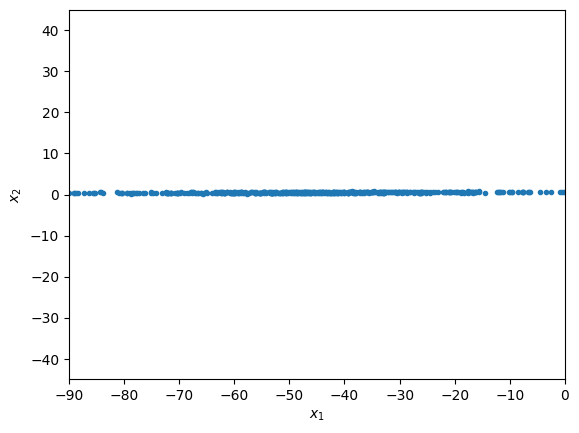

In [3]:
plt.plot(X[:,0],X[:,1],'.')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis([-90, 0, -45, 45])
plt.show()

we see that $x_1$ varies much more than $x_2$. This, however, might be deceiving, and due to a unit mismatch. We next normalize the data to remove this possible issue.

### *1.Normalization*

In [4]:
X_mean = np.mean(X, axis=0).reshape(1,2)
X_std   = np.std(X, axis=0).reshape(1,2)
X_norm  = (X-X_mean)/X_std

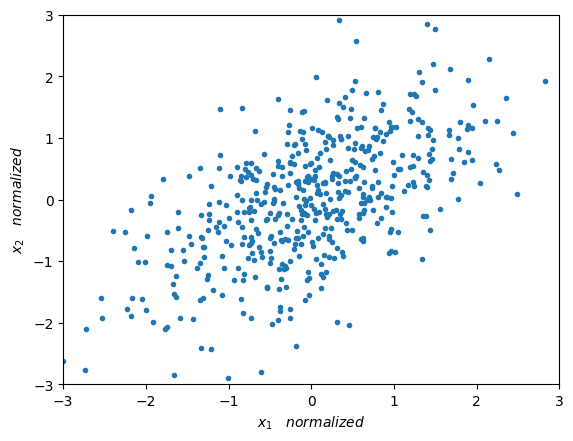

In [5]:
plt.plot(X_norm[:,0],X_norm[:,1],'.')
plt.xlabel(r'$x_1 \quad normalized $')
plt.ylabel(r'$x_2 \quad normalized $')
plt.axis([-3, 3, -3, 3])
plt.show()

Now we can appreciate a much more interesting distribution of our data. Next we will measure the variability of our data.

### *2. Covariance matrix*

Intuitively, the covariance matrix generalizes the notion of variance $ \sigma^2$ to multiple dimensions. Our example (a two-dimensional space), cannot be characterized completely by a single number (like $\sigma$), nor only by the variances of $ x_1 $ and $ x_2 $ ($\sigma_1$ and $\sigma_2$), as they do not contain all the necessary information. For this, we also need the information of how $ x_1 $ varies with respect to $ x_2 $, which we can be representd by a matrix of size $ D \times D = 2 \times 2$ as follows:

$cov(X) = 
\begin{bmatrix}
    \sigma^2_{1,1}  & \sigma^2_{1,2}  \\
    \sigma^2_{2,1}  & \sigma^2_{2,2}
\end{bmatrix}$

where:

$\sigma^2_{i,k} =  \frac{\sum_{i=1}^{M} (x_{i,j}-\mu_j)(x_{i,k}-\mu_k)}{M-1}$

If $j=k$,  $\sigma^2_{j,j} = \sigma^2_{j}$ then this is the variance of dimension $j$, which is the square of the standard deviation that we defined during the normalization of the data.

In [6]:
# Here we calculate the covariance matrix. Notice that the mean = 0.
Cov_M = np.zeros((2,2))
for point in range(np.shape(X_norm)[0]):
    point_  = X_norm[point,:].reshape(1,2)
    Cov_M   = Cov_M + np.matmul(point_.T,point_)
Cov_M = Cov_M/np.shape(X_norm)[0] 

# We calculate the covariance matrix taking advantage of numpy's vectorization
Cov_M2 = np.matmul(X_norm.T, X_norm)/X_norm.shape[0]

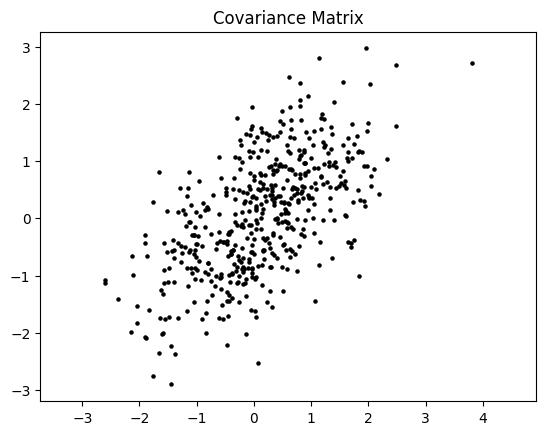

In [7]:
x_, y_ = np.random.multivariate_normal([0,0], Cov_M2, 500).T
plt.scatter(x_, y_, s=5, color='black')
plt.axis('equal')
plt.title('Covariance Matrix')
plt.show()

### *3. Eigendecomposition*

To simplify the notation, let us define $ cov (X) = A $. Now, we obtain the eigenvalues and eigenvectors for the covariance matrix:

$Av=\lambda v$


Where $ v\in \mathbb {R}^D $ is an **eigenvector**, which has the same dimension as the sides of our covariance matrix $A$. In our example $ D = 2 $. On the other hand $ \lambda \in \mathbb {R} $ is a scalar, and is the corresponding **eigenvalue**.

Let us remember that **matrices** are **linear transformations** that act on vectors. This is, given a vector $v$, and a matrix $A$, we can apply $A$ to $v$ and obtain $b$:

$Av = b$

**Eigenvectors** are the "axis" of the transformation represented by a matrix. Remember that a matrix changes the direction and magnitud of any vector that it is applied too, except for its  eigenvectors. When a matrix is applied to its eigenvector, the eigenvector does not change its direction (as would any other vector when the matrix is applied to it). On the other hand, the **eigenvalues** are the amount that eleigenvectors scale up or down when passing through the matrix. As shown in $Av=\lambda v$.

Let us now remember that the covariance matrix defines how scattered and correlated (or "tilted") our data is. So if we want to represent the covariance matrix with a vector and its magnitude (to decrease the dimensionality of the data), we should simply find the vector that points in the direction of the greatest "change" of the data. This direction happens to be the **eigenvector** with the larges **eigenvalue**.


In [8]:
eigenVal, eigenVec = LA.eig(Cov_M)
print("eigenvalue 1 = ",eigenVal[0], "   eigenvector 1 = ",eigenVec[:,0])
print("eigenvalue 2 = ",eigenVal[1], "   eigenvector 2 = ",eigenVec[:,1])

eigenvalue 1 =  0.41051742442625516    eigenvector 1 =  [-0.70710678  0.70710678]
eigenvalue 2 =  1.5894825755737454    eigenvector 2 =  [-0.70710678 -0.70710678]


We now plot the eigenvectors weighted by their respective eigenvalue.

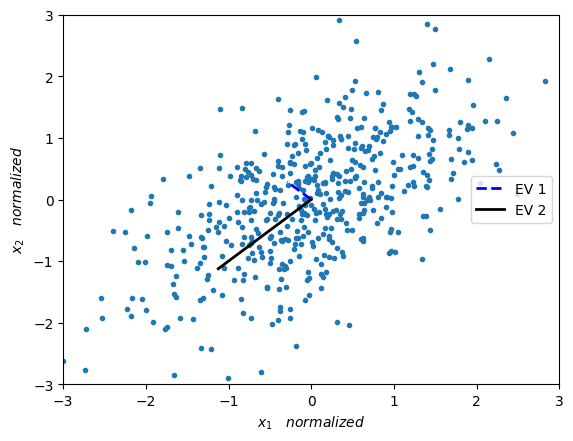

In [9]:
plt.plot(X_norm[:,0],X_norm[:,1],'.')
plt.plot([0,eigenVec[0,0]*eigenVal[0]],[0,eigenVec[1,0]*eigenVal[0]],'--', color='blue', label='EV 1', linewidth=2)
plt.plot([0,eigenVec[0,1]*eigenVal[1]],[0,eigenVec[1,1]*eigenVal[1]],'-', color='black', label='EV 2', linewidth=2)
plt.xlabel(r'$x_1 \quad normalized $')
plt.ylabel(r'$x_2 \quad normalized $')
plt.axis([-3, 3, -3, 3])
plt.legend(loc='center right')
plt.show()

### *4. Principal components*

We are interested in obtaining the principal components of our data. The principal components are those which capture the highest variation of the data, the rest, which do not present so much variation can be discarded.

Therefore, a natural option is to choose the main eigenvectors as  components. By main eigenvalues we refer to the ones with the highest eigenvalues. Therefore we choose $k$ eigenvectors, where $k<D$. In our example $ D = 2 $, so we choose $ k = 1 $. 

In [10]:
max_idx = np.argmax(eigenVal, axis=0)
P_vec   = eigenVec[:,max_idx]
print('P_vec = ',P_vec)

P_vec =  [-0.70710678 -0.70710678]


After computing the eigenvector, we project our data into this new reduced space. In oder words, our full data was in $ X \in \mathbb{R}^{D \times M} $ and we will project it onto a space in $ X \in\mathbb{R}^{k \times M} $, thus reducing the dimensionality from $ D $ to $ k $. Our objective is then to project our original space of 2 dimensions in which our data ($ D = 2 $) was located to the space of 1 dimension ($ k = 1 $) **described** by our eigenvector of greater relevance in the variation of the data.

In the below figure we can see a line (which is our new 1-dimensional space) onto which we wish to project our data.

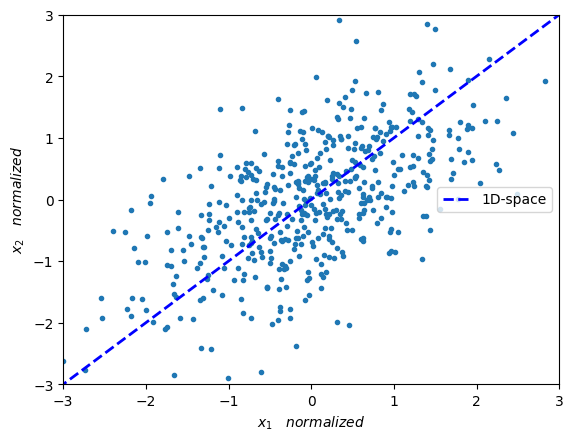

In [11]:
plt.plot(X_norm[:,0],X_norm[:,1],'.')
plt.plot([eigenVec[0,max_idx]*-10,eigenVec[0,max_idx]*10],
         [eigenVec[1,max_idx]*-10,eigenVec[1,max_idx]*10],'--', 
         color='blue', label='1D-space', linewidth=2.0)
plt.xlabel(r'$x_1 \quad normalized $')
plt.ylabel(r'$x_2 \quad normalized $')
plt.axis([-3, 3, -3, 3])
plt.legend(loc='center right')
plt.show()

Following from the above, we wish to project datapoints $x$ onto the space of an eigenvector $v$. More precisely, we wish to project datapoints which are in a 2-dimensional space onto a 1-dimensional space (which is spanned by the eigenvector with the largest eigenvalue).

For one point $x$ and the eigenvector $v$ this is done by:
$\frac{vv^T}{||v||^2}~x$

where $v^T$ means the transpose of vector $v$, and $||v||$ is the Euclidean norm of vector $v$.


$^*$ This is assuming an inner product in the Euclidean space

In [12]:
# -- Projecting the data into the 1-dimensional space -- #

# -- Taking advantage of numpy's vectorization we can project the whole matrix -- #
P_vec  = P_vec.reshape(P_vec.shape[0],1) # reshaping for easier handling
Y_1D   = np.matmul(P_vec.T,X_norm.T)     # projecting into 1D
Y_norm = np.matmul(P_vec,Y_1D).T         # projecting 1D back into 2D

# Note: P_vec has norm 1, so there is no need to compute the norm

We can visualize the data projected onto the 1-dimensional space below

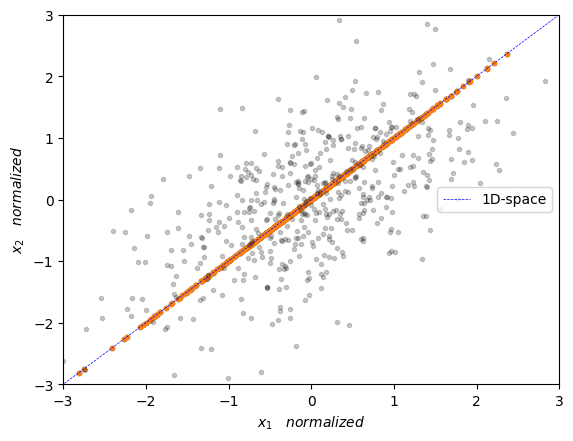

In [13]:
plt.plot(Y_norm[:],Y_norm[:],'.')
plt.plot(X_norm[:,0],X_norm[:,1],'.', alpha=0.2, color='black')
plt.plot([eigenVec[0,max_idx]*-10,eigenVec[0,max_idx]*10],[eigenVec[1,max_idx]*-10,eigenVec[1,max_idx]*10],'--', color='blue', label='1D-space', linewidth=0.5)
plt.xlabel(r'$x_1 \quad normalized $')
plt.ylabel(r'$x_2 \quad normalized $')
plt.axis([-3, 3, -3, 3])
plt.legend(loc='center right')
plt.show()

Now, [scikit-learn](https://scikit-learn.org/stable/) has a very handy [PCA implementation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) for this that we can use as follows:

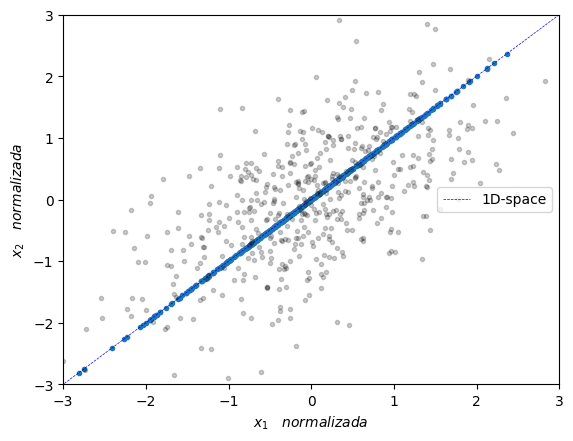

In [14]:
from sklearn.decomposition import PCA #import PCA from sklearn
pca = PCA(n_components=1)             # define how many principal components we wish to reduce our system to
pca.fit(X_norm)                       # obtain the components and its eigenvalues
X_pca = pca.transform(X_norm)         # apply dimensionality reduction
Y_pca = pca.inverse_transform(X_pca)  # get the data back on its original space

# visualize
plt.plot(Y_pca[:,0],Y_pca[:,1],'.')
plt.plot([eigenVec[0,max_idx]*-10,eigenVec[0,max_idx]*10],[eigenVec[1,max_idx]*-10,eigenVec[1,max_idx]*10],'--', color='blue', label='1D-space', linewidth=0.5)
plt.plot(X_norm[:,0],X_norm[:,1],'.', alpha=0.2, color='black')
plt.xlabel(r'$x_1 \quad normalizada $')
plt.ylabel(r'$x_2 \quad normalizada $')
plt.axis([-3, 3, -3, 3])
plt.legend(loc='center right')
plt.show()

## Tennessee Eastman process 🏭

In this notebook we will illustrate the capabilities of some unsupervised learning techniques that perform dimensionality reduction applied to the task of process monitoring. The case-study that we are going to use is the called Tennessee Eastman process (TEP) [{cite}`downs1993plant`]. The data collected here corresponds to simulated data and it is widely used in the process monitoring community. Initially, TEP was created by the company [Eastman](https://www.eastman.com/en) to provide a realistic scenerario in which to test different process monitoring methods.

In the following we will provide a short explanation of the process. If you like to have a more detailed explanation overall read Chapter 8 of [{cite}`russell2000data`].

The process consist of five major units:

*   Reactor
*   Condenser
*   Compressor
*   Separator
*   Stripper

and it contains eight components: the gaseous reactants $A$, $C$, $D$ and $E$ that are fed into the reactor along the inert $B$ to produce the liquids $G$ and $H$. The product $F$ is an unwanted byproduct.

$$
A(g) + C(g) + D(g) → G(liq)
$$

$$
A(g) + C(g) + E(g) → H(liq)
$$

$$
A(g) + E(g) → F(liq)
$$

$$
3D(g) → 2F(liq)
$$

The reactor product stream is then cooled using the condenser and fed to a flash separator. A recycle is implemented via the compressor with the necessary purge to prevent accumulation of $B$ and $F$. Finally, the liquid outlet of the separator is fed into a stripper for further separation. See the figure below for a schematic reresentation of the flowsheet.

```{figure} media/08_monitoring/TEP_flowsheet.png
:alt: cstr
:width: 80%
:align: center

Schematic representation of the Tennessee Eastman process flowsheet. Modified from [{cite}`russell2000data`].
```

The dataset contains 41 measured states and 11 manipulated variables. Some variables are sampled every 3 minutes, 6 minutes or 15 minutes. And all measurements include Gaussian noise.

The data contains 21 faults, out of which 16 are known (Faults 1-15 and 21). Some faults are caused by step changes in some process variables, while others are associated with a random variability increase. A slow drift in the reaction kinetics and sticking valves are other causes of the faults.

Let's import the data corresponding to the 21 faulty simulations (i.e., files 01 to 21) and the data for the normal operation (i.e., files with 00) using some for-loops and store it into a dictionary. 

### **Process faults**

File | Description                                            | Type
---- | ------------------------------------------------------ | ----
00   | Normal operation                                       |
01   | A/C Feed Ratio, B Composition Constant (Stream 4)      | Step
02  | B Composition, A/C Ratio Constant (Stream 4)            | Step
03  | D Feed Temperature (Stream 2)                           | Step
04  | Reactor Cooling Water Inlet Temperature                 | Step
05  | Condenser Cooling Water Inlet Temperature               | Step
06  | A Feed Loss (Stream 1)                                  | Step
07  | C Header Pressure Loss - Reduced Availability (Stream 4)| Step
08  | A, B, C Feed Composition (Stream 4)                     | Random Variation
09  | D Feed Temperature (Stream 2)                           | Random Variation
10 | C Feed Temperature (Stream 4)                            | Random Variation
11 | Reactor Cooling Water Inlet Temperature                  | Random Variation
12 | Condenser Cooling Water Inlet Temperature                | Random Variation
13 | Reaction Kinetics                                        | Slow Drift
14 | Reactor Cooling Water Valve                              | Valve Sticking
15 | Condenser Cooling Water Valve                            |Valve Sticking
16 | Unknown
17 | Unknown
18 | Unknown
19 | Unknown
20 | Unknown
21 | Unknown

As you can suspect from the code below, the data has already being splitted into training and test.

In [15]:
data_dict = {}
for i in tqdm(range(22)):
  i_str = str(i)
  if len(i_str) == 1:
    term = '0'+i_str
  else:
    term = i_str
  for split in ['','_te']:
    term = term + split
    if 'google.colab' in str(get_ipython()):
      data_dict[term] = np.loadtxt('https://raw.githubusercontent.com/edgarsmdn/MLCE_book/main/references/d' 
                               + term + '.dat')
    else:
      data_dict[term] = np.loadtxt('references/d'+ term + '.dat')
data_dict['00'] = data_dict['00'].T

  0%|          | 0/22 [00:00<?, ?it/s]

In [16]:
data_dict['00'].shape

(500, 52)

each dataset is reported in the form of a matrix where the 52 columns correspond to the 41 process measurements + 11 manipulated variables according to the following tables

### Process variables

**Process Measurements (3 minutes)**

Column | Description                         | Unit
------ | ----------------------------------- | ----
1      | A Feed  (stream 1)                  | kscmh
2      | D Feed  (stream 2)                  | kg/hr
3      | E Feed  (stream 3)                  | kg/hr
4      | A and C Feed  (stream 4)            | kscmh
5      | Recycle Flow  (stream 8)            | kscmh
6      | Reactor Feed Rate  (stream 6)       | kscmh
7      | Reactor Pressure                    | kPa gauge
8      | Reactor Level                       | %
9      | Reactor Temperature                 | Deg C
10     | Purge Rate (stream 9)               | kscmh
11     | Product Sep Temp                    | Deg C
12     | Product Sep Level                   | %
13     | Prod Sep Pressure                   | kPa gauge
14     | Prod Sep Underflow (stream 10)      | m3/hr
15     | Stripper Level                      | %
16     | Stripper Pressure                   | kPa gauge
17     | Stripper Underflow (stream 11)      | m3/hr
18     | Stripper Temperature                | Deg C
19     | Stripper Steam Flow                 | kg/hr
20     | Compressor Work                     | kW
21     | Reactor Cooling Water Outlet Temp   | Deg C
22     | Separator Cooling Water Outlet Temp | Deg C

**Reactor feed analysis (6 minutes)**

Column | Description | Unit
------ | ----------- | ----
23     | Component A | % mol
24     | Component B | % mol
25     | Component C | % mol
26     | Component D | % mol
27     | Component E | % mol
28     | Component F | % mol

**Purge gas analysis (6 minutes)**

Column | Description | Unit
------ | ----------- | ----
29     | Component A | % mol
30     | Component B | % mol
31     | Component C | % mol
32     | Component D | % mol
33     | Component E | % mol
34     | Component F | % mol
35     | Component G | % mol
36     | Component H | % mol

**Product analaysis (15 minutes)**

Column | Description | Unit
------ | ----------- | ----
37     | Component D | % mol
38     | Component E | % mol
39     | Component F | % mol
40     | Component G | % mol
41     | Component H | % mol

**Manipulated variables**

Column | Description 
------ | ----------- 
42     | D Feed Flow (stream 2)            
43     | E Feed Flow (stream 3)            
44     | A Feed Flow (stream 1)        
45     | A and C Feed Flow (stream 4)
46     | Compressor Recycle Valve
47     | Purge Valve (stream 9)
48     | Separator Pot Liquid Flow (stream 10)
49     | Stripper Liquid Product Flow (stream 11)
50     | Stripper Steam Valve
51     | Reactor Cooling Water Flow
52     | Condenser Cooling Water Flow

For instance, let's observe the profile under normal conditions of the reactor pressure

(0.0, 500.0)

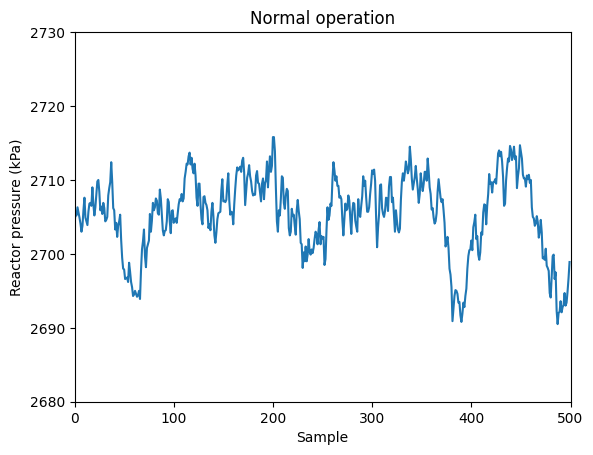

In [17]:
var = 7
plt.plot(data_dict['00'][:,var-1])
plt.xlabel('Sample')
plt.ylabel('Reactor pressure (kPa)')
plt.title('Normal operation')
plt.ylim(2680, 2730)
plt.xlim(0,500)

If you observe, during normal operation the reactor pressure is kept around 2750 kPa.

Let's compare this to the profile under faulty conditions caused by an step change in the composition of the inert species $B$ in the inlet stream (Fault 02). 

(0.0, 500.0)

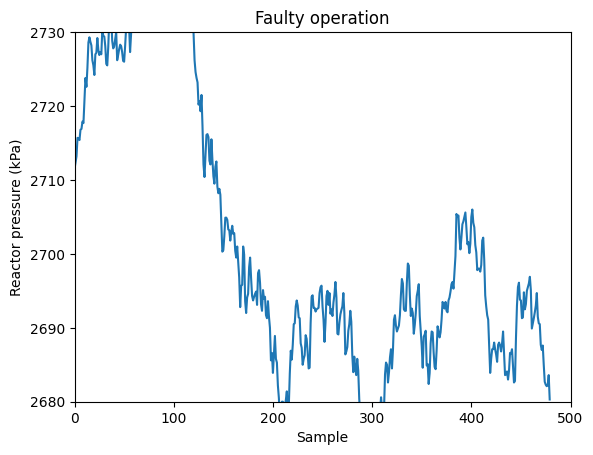

In [18]:
var = 7
plt.plot(data_dict['02'][:,var-1])
plt.xlabel('Sample')
plt.ylabel('Reactor pressure (kPa)')
plt.title('Faulty operation')
plt.ylim(2680, 2730)
plt.xlim(0,500)

The disturbance is apparent! The pressure in the reactor increases and then slowly comes back due to the control system that it has. This univariate method for process monitoring is closely related to the so-called [Shewhart charts](https://en.wikipedia.org/wiki/Shewhart_individuals_control_chart).


However, this method ignore the correlation between the process variables. In other words, some faults required the use of multivariate statistics because the fault might not become evident in the univariate cases of all process variables (i.e., all process variables individually might appear to be within normal ranges), but rather in the combination of several of them.

### $T^2$ and $Q$ indices

Let's consider the above matrix of observations $X$. The sample covariance matrix is

$$
S = \frac{1}{n_d-1}X^TX
$$

and the eigenvalue decomposition of this matrix is

$$
S = V \Lambda V^T 
$$

if we assume that $S$ is invertible and using the definition

$$
\bf{z} = \Lambda^{-1/2}V^T\bf{x}
$$

we can define the [Hotelling's $T^2$ index](https://en.wikipedia.org/wiki/Hotelling%27s_T-squared_distribution)

$$
T^2 = \bf{z}^T\bf{z}
$$

The $T^2$ index is a measure of how different an observation $\bf{x}$ is from the mean of the multivariate distribution. It takes into account the direction of the data and the variability along different directions. This allows a scalar threshold to characterize the variability of the data in the entire observation space. By comparing the $T^2$ index to a threshold value, we can determine if the observation is significantly different from the expected conditions and in this way use it for detecting faults. This threshold value can be determined automatically based on the level of significance we choose, using probability distributions. One significant threshold can be calculated as

$$
T^2_\alpha = \frac{(n_x)(n_d-1)(n_d+1)}{n_d(n_d-n_x}F_\alpha (n_x, n_d-n_x)
$$

with $F_\alpha$ being the upper 100$\alpha$% critical point of the [F-distribution](https://en.wikipedia.org/wiki/F-distribution) with the indicated degrees of freedom.

Heuristically, the required number of observations to use $T^2$ as a process monitoring tool is approximately 10 times the dimensionality of the input space. This motivates the use of dimensionality reduction in the context of process monitoring. 

Another important reason for employing dimensionality reduction techniques, perhaps the most significant one, is that the $T^2$ index may not accurately represent the behavior of the process in the directions corresponding to smaller singular values. The inaccuracies in these smaller singular values have a substantial impact on the calculated $T^2$ index due to the inversion of their squared values. Moreover, these smaller singular values are susceptible to errors since they often possess low signal-to-noise ratios. Consequently, it is advisable in such cases to retain only the eigenvectors associated with the larger singular values when computing the $T^2$ statistic.

This sensitivity of the $T^2$ statistic to the smaller singular values also motivates the use of the $Q$ index  which can be computed as

$$
Q = R^TR
$$

where $R=X-\hat{X}$ is the residual matrix measuring the discrepancy between the observation in the original space and the observation reconstructed from the reduced space (i.e., the observation reconstructed using the reduced number of principal components). If a data point has a large $Q$ value, it suggests that the model is not able to adequately explain that observation, indicating an unusual pattern in the data. The threshold used for $Q$ is given by

$$
Q_\alpha = \theta_1 \left( \frac{h_0 c_{\alpha} (2\theta_2)^{1/2}}{\theta_1} + 1 + \frac{\theta_2 h_0 (h_0-1)}{\theta_1^2} \right)^{1/h_0}
$$

where $\theta_i = \sum_{j=n_x+1}^{n_x}\lambda_j^{2 i}$ and $h_0=1-\frac{2\theta_1 \theta_3}{3 \theta_2^2}$

Since $T^2$ and $Q$ detect different types of faults, they are both used together as process monitoring tools!



### Fault detection

Let's now jump into using these two indices for fault detection. We are going to consider here Fault 1 which is caused by an step change in the $A/C$ feed ratio in stream 4. This results in a decrease in the $A$ feed in the recycle stream 5 and the control system reacts to increase the $A$ feed in stream 1.

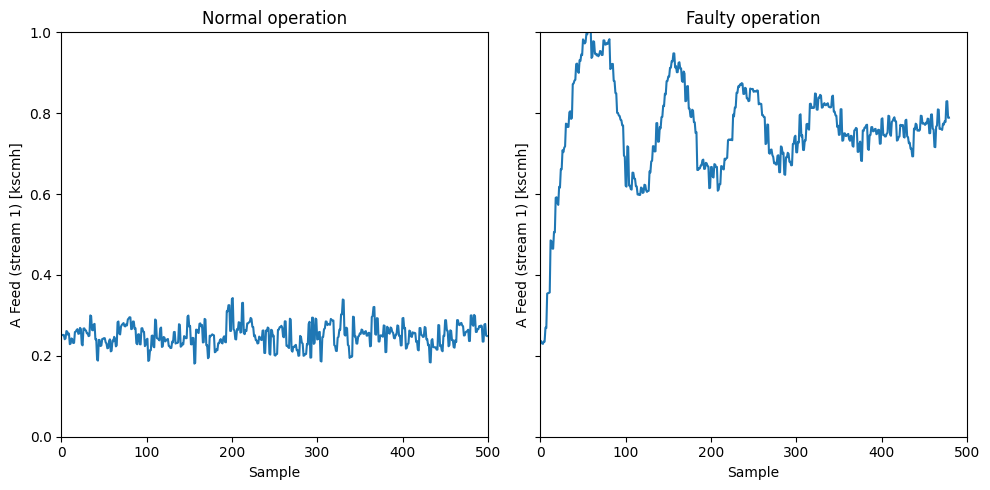

In [19]:
var = 1

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

ylabel = 'A Feed (stream 1) [kscmh]'
ylim = [0, 1]

axs[0].plot(data_dict['00'][:,var-1])
axs[0].set_xlabel('Sample')
axs[0].set_ylabel(ylabel)
axs[0].set_title('Normal operation')
axs[0].set_ylim(ylim[0], ylim[1])
axs[0].set_xlim(0,500)

axs[1].plot(data_dict['01'][:,var-1])
axs[1].set_xlabel('Sample')
axs[1].set_ylabel(ylabel)
axs[1].set_title('Faulty operation')
axs[0].set_ylim(ylim[0], ylim[1])
axs[1].set_xlim(0,500)

plt.tight_layout()
plt.show()

This control response results that the concentration of $A$ in stream 6 reaches steady-state after enough time  

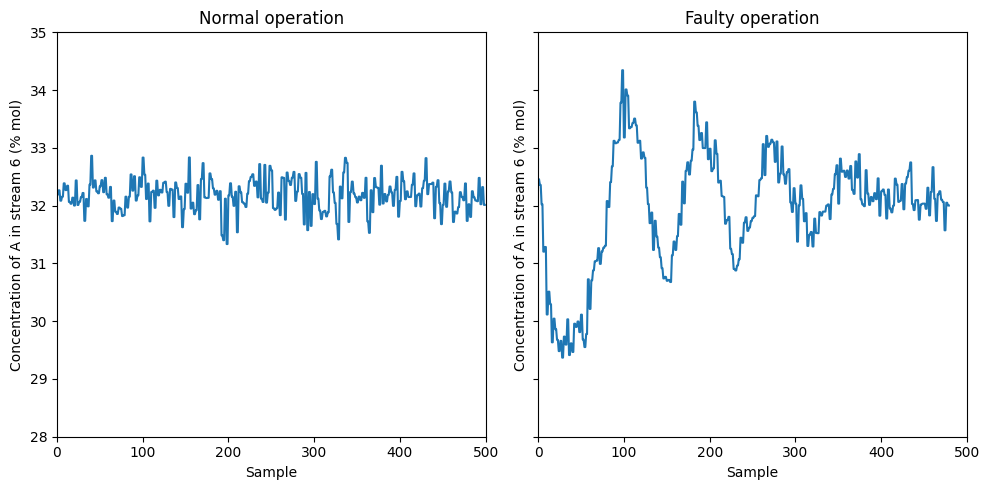

In [20]:
var = 23

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

ylabel = 'Concentration of A in stream 6 (% mol)'
ylim = [28, 35]

axs[0].plot(data_dict['00'][:,var-1])
axs[0].set_xlabel('Sample')
axs[0].set_ylabel(ylabel)
axs[0].set_title('Normal operation')
axs[0].set_ylim(ylim[0], ylim[1])
axs[0].set_xlim(0,500)

axs[1].plot(data_dict['01'][:,var-1])
axs[1].set_xlabel('Sample')
axs[1].set_ylabel(ylabel)
axs[1].set_title('Faulty operation')
axs[0].set_ylim(ylim[0], ylim[1])
axs[1].set_xlim(0,500)

plt.tight_layout()
plt.show()

Let's see if we can detect this faults automatically using the $T^2$ and $Q$ indices in the reduced space

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
fault = '01'
X_train = np.hstack((data_dict['00'][:,:22],data_dict['00'][:,41:]))

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)

In [24]:
pca = PCA()
X_PCA = pca.fit_transform(X_train_norm)                       

Let's now visualize the cumulative explained variance by the principal components

Text(0.5, 0, 'Number of principal component')

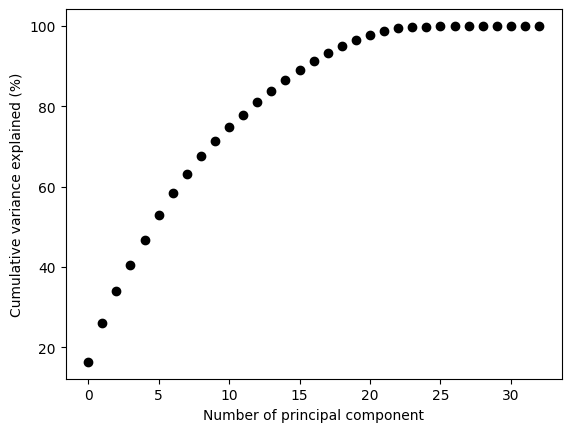

In [25]:
cum_var = np.cumsum(pca.explained_variance_ratio_ * 100)
plt.plot(cum_var, 'ko')
plt.ylabel('Cumulative variance explained (%)')
plt.xlabel('Number of principal component')

Let's for now select the number of principal components that account for the 90% of the variance

In [26]:
n_pcs = np.argmax(cum_var >= 90) +1
n_pcs

17

This means that the first 15 principal componets explain 90% of the variance. This translates to a dimensionality reduction from 52 to 15 by only missing 10% of the "information". Quite impressive right?

Let's now extract the first 15 principal components

In [27]:
T = X_PCA[:, :n_pcs]
T.shape

(500, 17)

This is equivalent as doing

In [28]:
pca = PCA(n_components=0.9)
pca.fit(X_train_norm)
T_train = pca.transform(X_train_norm)
T_train.shape

(500, 17)

we can reconstruct the observations from the reduced space like this

In [29]:
X_test = np.hstack((data_dict[fault+'_te'][:,:22],data_dict[fault+'_te'][:,41:]))
X_test_norm = scaler.transform(X_test)
T_test = pca.transform(X_test_norm)

In [30]:
X_test_norm_reconstruct = pca.inverse_transform(T_test)
X_test_norm_reconstruct.shape

(960, 33)



Let's now create functions for the $T^2$ and $Q$ statistics

In [31]:
from scipy.stats import f, norm

def compute_T2(T):
    # Calculate the covariance matrix
    S = (1 / (T_train.shape[0] - 1)) * np.dot(T_train.T, T_train)

    # Perform eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(S)

    # Sort eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Compute z scores
    z = np.dot(np.dot(np.linalg.inv(np.diag(np.sqrt(eigenvalues))), eigenvectors.T), T.T)

    # Calculate T^2 statistic
    T2 = np.sum(z ** 2, axis=0)

    # Threshold for T2
    n_d, n_x = T_train.shape
    alpha = 0.01
    T2_alpha = n_x*(n_d-1)*(n_d+1)/(n_d*(n_d-n_x))*f.ppf(1-alpha, n_x, n_d-n_x)

    return T2, T2_alpha


def compute_Q(X_norm, X_reconstruct):
    # Compute the residual matrix
    R = X_norm - X_reconstruct

    # Compute Q statistic
    Q = np.sum(R**2,axis=1)

    # Threshold for Q
    S = (1 / (X_train_norm.shape[0] - 1)) * np.dot(X_train_norm.T, X_train_norm)
    eigenvalues, eigenvectors = np.linalg.eig(S)

    n_x = T_train.shape[1]
    n_d = eigenvalues.shape[0]
    alpha=0.01

    theta1 = np.sum(eigenvalues[n_x:n_d+1]**2)
    theta2 = np.sum(eigenvalues[n_x:n_d+1]**4)
    theta3 = np.sum(eigenvalues[n_x:n_d+1]**6)
    h0 = 1 - 2*theta1*theta3/(3*theta2**2)

    c_alpha = norm.ppf(1-alpha)
    Q_alpha = theta1*(h0*c_alpha*(2*theta2)**0.5/theta1 + 1 + theta2*h0*(h0-1)/(theta1**2))**(1/h0)

    return Q, Q_alpha


In [32]:
T2, T2_alpha = compute_T2(T_test)
Q, Q_alpha = compute_Q(X_test_norm, X_test_norm_reconstruct)

Text(0, 0.5, '$T^2$ index')

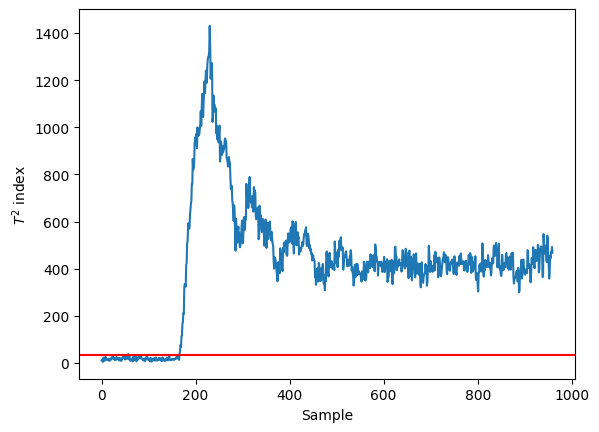

In [33]:
plt.plot(T2)
plt.axhline(y=T2_alpha, color='red')
plt.xlabel('Sample')
plt.ylabel('$T^2$ index')

Text(0, 0.5, 'Q index')

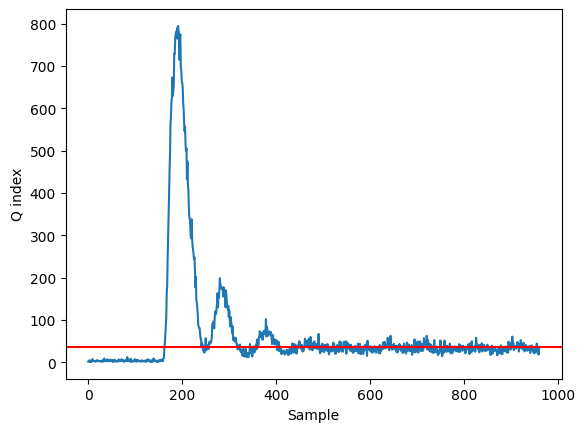

In [34]:
plt.plot(Q)
plt.axhline(y=T2_alpha, color='red')
plt.xlabel('Sample')
plt.ylabel('Q index')

We can clearly detect the fault happening around the 200 sample!

## References

```{bibliography}
:filter: docname in docnames
```